## Практична робота 08.10
#### Створити автокодувальник для датасету рукописних цифр за допомогою бібліотеки Keras (використовуємо тільки звичайні шари).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from keras import layers, models

### Побудувати автокодувальник без шуму, графік функції втрат, результати розпізнавання.

In [2]:
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
x_train = x_train.astype(np.float32) / 255
x_test = x_test.astype(np.float32) / 255

In [4]:
x_train = x_train.reshape(-1, 28 * 28)
x_test = x_test.reshape(-1, 28 * 28)
input_layer = layers.Input(shape=(784,))

In [5]:
# Побудова енкодера
encoded = layers.Dense(128, activation='relu')(input_layer)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)

# Побудова декодера
decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

# Створення автоенкодера
autoencoder = models.Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

### Навчання моделі

In [6]:

history = autoencoder.fit(
    x_train,
    x_train,
    epochs=50,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test, x_test)
)

# Відновлені зображення
decoded_images = autoencoder.predict(x_test)

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3428 - val_loss: 0.1711
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1624 - val_loss: 0.1362
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1335 - val_loss: 0.1226
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1225 - val_loss: 0.1158
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1159 - val_loss: 0.1110
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1113 - val_loss: 0.1075
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1079 - val_loss: 0.1046
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1050 - val_loss: 0.1020
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1024 - val_loss: 0.1000
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1006 - val_loss: 0.0981
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0990 - val_loss: 0.0981
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [7]:
decoded_images = autoencoder.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 717us/step


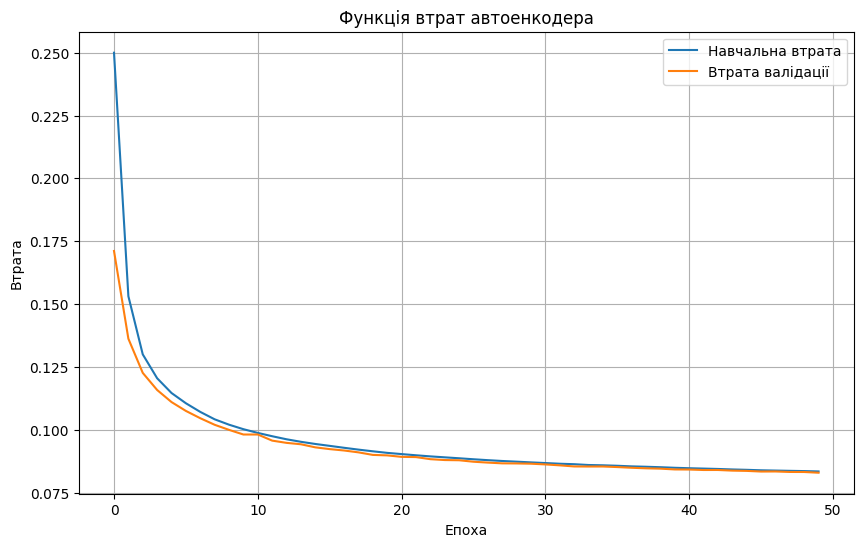

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Навчальна втрата')
plt.plot(history.history['val_loss'], label='Втрата валідації')
plt.title('Функція втрат автоенкодера')
plt.xlabel('Епоха')
plt.ylabel('Втрата')
plt.legend()
plt.grid()
plt.show()

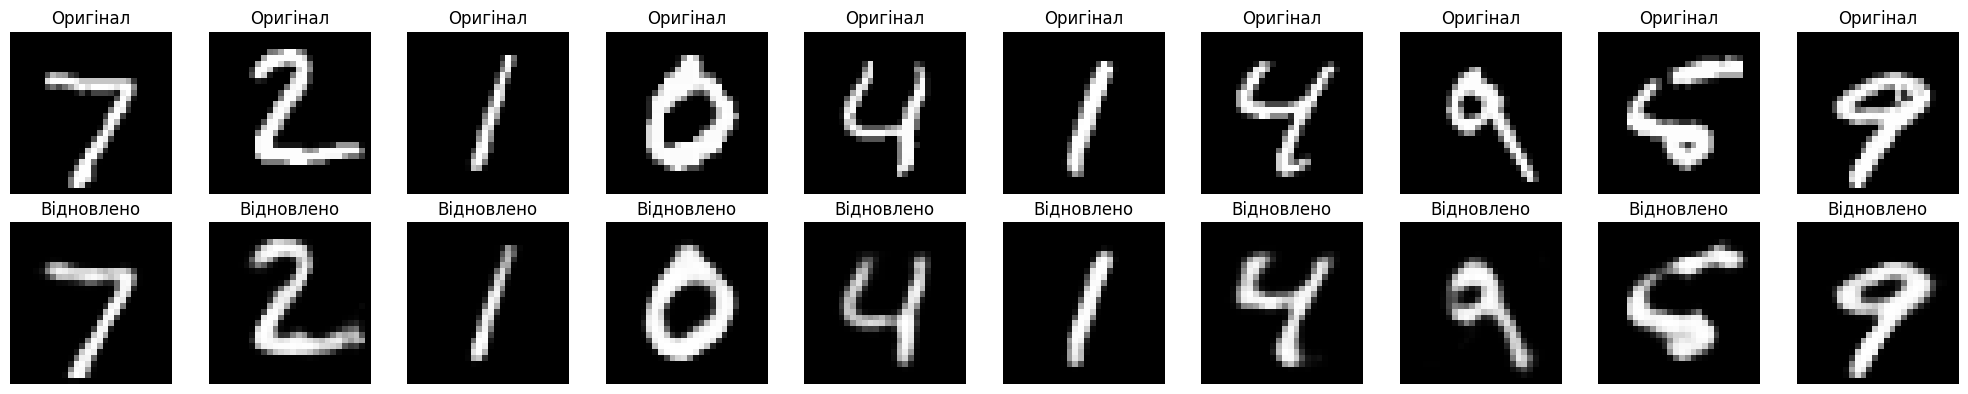

In [9]:
num_images = 10
plt.figure(figsize=(20, 4))

for i in range(num_images):
    # Відображення оригінального зображення
    plt.subplot(2, num_images, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Оригінал")
    plt.axis('off')

    # Відображення відновленого зображення
    plt.subplot(2, num_images, i + 1 + num_images)
    plt.imshow(decoded_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Відновлено")
    plt.axis('off')

plt.tight_layout()
plt.show()

### Побудувати автокодувальник із шумом, графік функції втрат, результати розпізнавання.

In [10]:
def add_noise(images, noise_factor=0.5):
    noisy_images = images + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=images.shape)
    return np.clip(noisy_images, 0., 1.)

In [11]:
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

In [12]:
x_train_noisy = add_noise(x_train)
x_test_noisy = add_noise(x_test)

In [13]:
input_layer = layers.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu')(input_layer)
encoded = layers.Dense(64, activation='relu')(encoded)
encoded = layers.Dense(32, activation='relu')(encoded)
decoded = layers.Dense(64, activation='relu')(encoded)
decoded = layers.Dense(128, activation='relu')(decoded)
decoded = layers.Dense(784, activation='sigmoid')(decoded)

autoencoder = models.Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')


history = autoencoder.fit(
    x_train_noisy,
    x_train,
    epochs=50,
    batch_size=256,
    shuffle=True,
    validation_data=(x_test_noisy, x_test)
)

decoded_imgs_noisy = autoencoder.predict(x_test_noisy)

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.3438 - val_loss: 0.2147
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2030 - val_loss: 0.1752
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1712 - val_loss: 0.1598
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1580 - val_loss: 0.1518
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1516 - val_loss: 0.1473
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1471 - val_loss: 0.1435
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1432 - val_loss: 0.1405
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1405 - val_loss: 0.1379
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1381 - val_loss: 0.1364
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1362 - val_loss: 0.1346
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1343 - val_loss: 0.1331
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

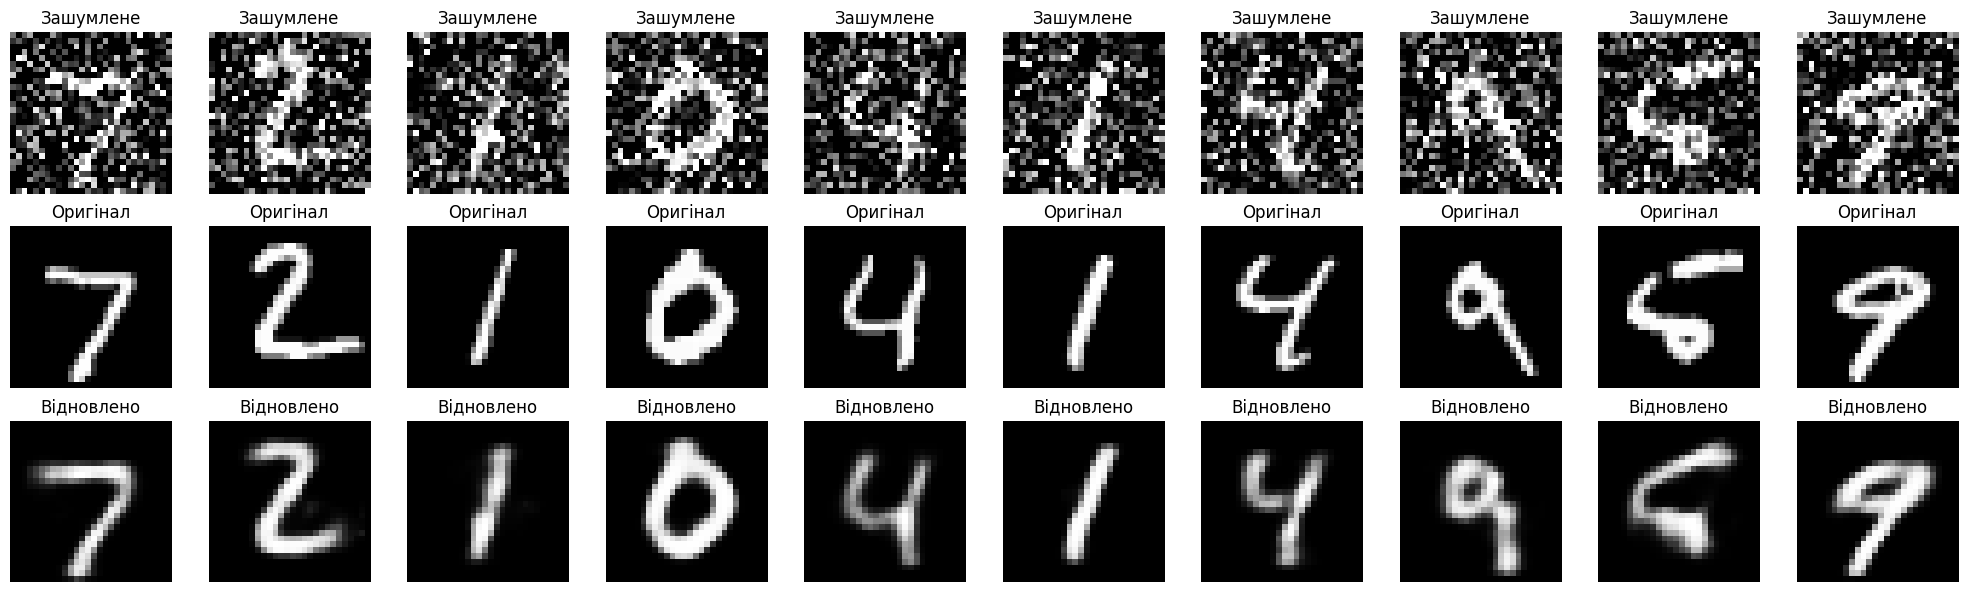

In [14]:
num_images = 10
plt.figure(figsize=(20, 6))

for i in range(num_images):
    plt.subplot(3, num_images, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap='gray')
    plt.title(f"Зашумлене")
    plt.axis('off')

    plt.subplot(3, num_images, i + 1 + num_images)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Оригінал")
    plt.axis('off')

    plt.subplot(3, num_images, i + 1 + 2*num_images)
    plt.imshow(decoded_imgs_noisy[i].reshape(28, 28), cmap='gray')
    plt.title(f"Відновлено")
    plt.axis('off')

plt.tight_layout()
plt.show()

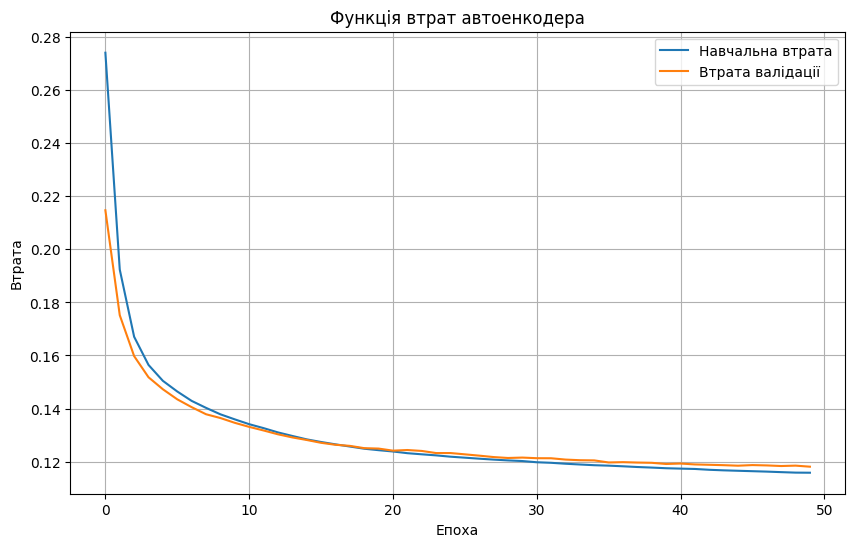

In [15]:

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Навчальна втрата')
plt.plot(history.history['val_loss'], label='Втрата валідації')
plt.title('Функція втрат автоенкодера')
plt.xlabel('Епоха')
plt.ylabel('Втрата')
plt.legend()
plt.grid()
plt.show()

### Розподіл векторів прихованого шару

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step


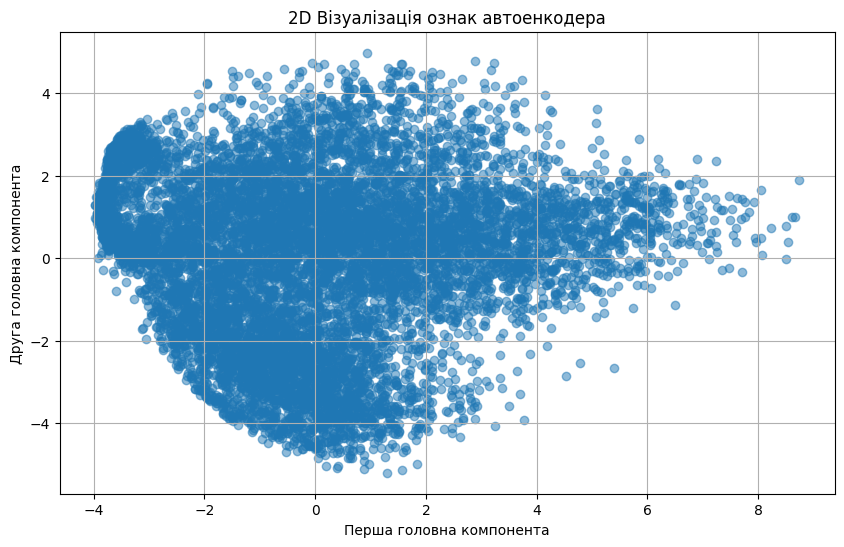

In [16]:
h = autoencoder.predict(x_test)

# Зменшення розмірності до 2D
pca = PCA(n_components=2)
h_reduced = pca.fit_transform(h)

plt.figure(figsize=(10, 6))
plt.scatter(h_reduced[:, 0], h_reduced[:, 1], alpha=0.5)
plt.title('2D Візуалізація ознак автоенкодера')
plt.xlabel('Перша головна компонента')
plt.ylabel('Друга головна компонента')
plt.grid()
plt.show()

# Висновок

### В цій практичній роботі було створено автоенкодер для відновлення зображень з набору даних MNIST. Після нормалізації та внесення шуму, модель показала високу здатність відновлювати початкові зображення, навіть у зашумленому стані. Отримані результати підкреслюють високу ефективність моделі, що відкриває перспективи для подальших досліджень у галузі обробки зображень і машинного навчання.





